# 2. 乱数を用いた確率の実験

確率論で知られるいくつかの理論を実際に実験をして確かめる。

## 二項分布：コインを投げる実験

### ベルヌーイ試行

- コイン投げのように繰り返し行う試行
- 表 or 裏のように、ただ２つの結果だけが可能
- 各試行が同様に確からしい
- $n$ 回コインを投げて $k$ 回表、$(n-k)$ 回裏が出る場合の数は以下(=「二項係数」)：

$$
    \binom{n}{k} =　_{n}C_{k} = \frac{n!}{k!(n-k)!}
$$

- 表が出る確率を $p$ とすると、$k$ 回表が出る確率は以下(=「二項分布」)：

$$
    b(k) = \binom{n}{k}p^{k}(1-p)^{n-k}
$$

## 二項分布のシミュレーション

- 以下の図のように、コインを $n$ 回ずつ区切って$m$ 回、全部で $n \times m$ 回投げる

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig3-1-21.jpg)

- 表が出る確率 $p = 0.5$ とする

In [1]:
using Random
using Printf

count = 10000　      # 発生させる乱数の数
b = zeros(Int, 20)   # 度数
p = 0.5              # 表の出る確率
k = 0                # 表の出た回数
n = 6                # コイン投げの回数

"""
ベルヌーイ試行の実行
発生させた乱数が確率 p より大きかった回数を返却する
"""
function bernoulli(p::Float64, n::Int)::Int
    k = 0
    for i = 1:n
        if p > rand()
            k += 1
        end
    end
    
    return k
end


"""
二項分布の理論値の計算
"""
function binomial(p::Float64, n::Int, k::Int)::Float64
    k1 = 1
    for i = 2:k
        k1 *= i
    end
    
    n1 = 1
    for i = (n-k+1):n
        n1 *= i
    end
    
    b = (n1 / k1) * p^k * (1-p)^(n-k)
    
    return b
end


# 以下、メインの処理
for j = 1:count
    k = bernoulli(p, n)
    b[k+1] += 1
end

@printf "%4s %10s %10s\n" "k" "simuration" "theory"

for k = 0:n
    binom = b[k+1] / count
    @printf "%4d %10f %10f\n" k binom binomial(p, n, k)
end

   k simuration     theory
   0   0.015600   0.015625
   1   0.099900   0.093750
   2   0.233700   0.234375
   3   0.308800   0.312500
   4   0.232400   0.234375
   5   0.094900   0.093750
   6   0.014700   0.015625


## ポアソン分布：極稀にしか起こらないこと

- ベルヌーイ試行のうち、 `p` が小さい = 極稀にしか起こらない場合を考えると、式変形により以下のようになる：

$$
    b(k) = \binom{n}{k}p^{k}(1-p)^{n-k} \approx \frac{\lambda^k}{k!}e^{-\lambda}
$$

### ポアソン分布のシミュレーション

- 先のベルヌーイの試行実験のプログラムを改造して，$p$ を小さく $n$ を大きくして実行する。
  - 例えば，$p = 1/100，n = 100$ とした場合
- $p$ を小さく $n$ を大きくすると、理論値とシミュレーションの値がよく近づく

In [2]:
using Random
using Printf

count = 10000     　 # 発生させる乱数の数
b = zeros(Int, 20)   # 度数
p = 0.01             # 確率小
k = 0                # 表の出た回数
n = 100              # 回数大

"""
ベルヌーイ試行の実行
発生させた乱数が確率 p より大きかった回数を返却する
"""
function bernoulli(p::Float64, n::Int)::Int
    k = 0
    for i = 1:n
        if p > rand()
            k += 1
        end
    end
    
    return k
end

"""
ポアソン分布の理論値の計算
"""
function poisson(lambda::Float64, k::Int)::Float64
    k1 = 1
    for i = 2:k
        k1 *= i
    end
    
    b = (lambda^k / k1) * exp(-lambda)
    
    return b
end

# 以下、メインの処理
for j = 1:count
    k = bernoulli(p, n)
    b[k+1] += 1
end

@printf "%4s %10s %10s\n" "k" "simuration" "theory"

lambda = n * p

for k = 0:10
    poiss = b[k+1] / count
    @printf "%4d %10f %10f\n" k poiss poisson(lambda, k)
end

   k simuration     theory
   0   0.366400   0.367879
   1   0.369900   0.367879
   2   0.185800   0.183940
   3   0.061300   0.061313
   4   0.013800   0.015328
   5   0.002000   0.003066
   6   0.000800   0.000511
   7   0.000000   0.000073
   8   0.000000   0.000009
   9   0.000000   0.000001
  10   0.000000   0.000000


### 時系列的にランダムに起きること

- 時間の経過のうちに起こってくる、ランダムな事象の確率分布は、ポアソン分布となる。
    - 放射性物質の崩壊や、電話交換機に入ってくる通話の呼び出し、駅の自動販売機に到着する客など。
    - このような到着の仕方をポアソン到着という。
    - ポアソン到着は、待ち行列理論、トラヒック理論などの基本となる。
- 単位時間あたりに発生する事象の平均数を $\lambda$ とすると、任意の長さの時間間隔 $t$ 内に発声する事象の平均数は $\lambda t$ となる。
- $t$ を $n$ 個の小区間 $\Delta t$ ずつに分けると、 $\Delta t = t / n$ になるが、区間数 $n$ を十分大きく取り、 $\Delta t$ を十分小さくすると、$\Delta t$ の間に事象が 2 回発生する確率を無視できる。
- 特定の小区間 $\Delta t$ において、事象の発生する確率を求めると、以下のようになる：

$$
    \frac{\lambda t}{n} = \lambda\cdot\Delta t
$$

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig3-2-1.jpg)

- これは時間経過が $\Delta t$ あるごとに、$p = \lambda t/n$ の確率のベルヌーイ試行を行っていると見ることができるので、ベルヌーイの試行の式に $p$ を代入すると、以下のようになる：

$$
    b(k) = \binom{n}{k}\cdot\left(\frac{\lambda t}{n}\right)^{k}\cdot\left(1-\frac{\lambda t}{n}\right)^{n-k}
$$

- ここで、 $\lambda\Delta t \ll 1$ なので、以下のように近似される：

$$
    p(k) = \frac{(\lambda t)^k}{k!}e^{-\lambda t}
$$

- 単位時間にあたり $\lambda$ の到着のある事象において、時間間隔 $t$　に、ちょうど $k$　単位の到着がある確率を表わす

## 指数分布：ごくまれにしか起こらないことの時間間隔

### ポアソン分布と指数分布は表と裏の関係

時間経過のうちにランダムに生起する事象の、時間の間隔の分布を考える。

公衆電話に次々と客がやって来る問題を考える。時間 $t$ 内に到着する客の数はポアソン分布となる。下の図のように $t1$、$t2$、$t3$、･･･と客が到着するとき、下の式で表される到着の間隔はどのような確率になるか。

$$
    \tau_1 = t_2 - t_1 \\
    \tau_2 = t_3 - t_2
$$

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig3-3-1.jpg)

ポアソン分布の式において、$k=0$, すなわち $0$ から $t$ までの間に客が到着しなかったとすると、

$$
    p(0) = e^{-\lambda t}
$$

となり、この値は相次いで起こる事象の間隔が $ｔ$ よりも大きい確率に相当する。一方、間隔の確率を $f(\tau)$ と書くと、$0$ から $t$ までの間に到着しなかった確率は、

$$
    \int_{0}^{\infty}f(\tau)d\tau = p(0)
$$

となり、これを $f(\tau)$ について解くと、

$$
    f(\tau) = \lambda e^{-\lambda\tau}
$$

が得られる。この式は、ポアソン到着の場合の間隔は指数分布にしたがうということを、表わす。

### 指数分布のシミュレーション

コンピュータで乱数を発生させ，事象の起こる時間間隔が本当に指数分布になるかどうか実験する。

- 時刻は `t` で表わされ，`dt` という微小時間ずつ進める。
- 単位時間に事象の起こる平均確率 $\lambda$ を `lambda`, また $\tau$ を `tau` と表している。
- `dt` 内に事象は `lanbda*dt` の確率で，たかだか 1 つ発生する。すなわち `dt` ごとに 1/100 の発生確率の事象をおこさせている。
- 1 つ前に起こった時刻との差 $\tau$ を求め， $\tau$ の整数部分の頻度をカウントする。

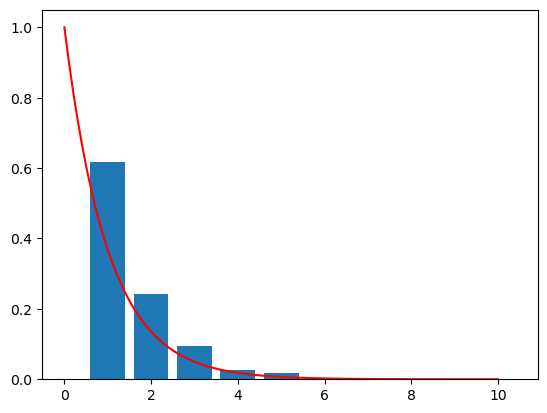

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8489f528b0>

In [191]:
using PyPlot

function exponent(lambda::Float64, tau::Float64)::Float64
    lambda * exp(-lambda * tau)
end

t_end = 1000    # シミュレーション終了時刻
t_disp = 20.0   # シミュレーション表示時刻
tau_max = 10    # τ の最大値

f = zeros(Int, tau_max) # ヒストグラム
lambda = 1              # λ の値
dt = 0.01               # 微小時間
t0 = 0.0                # 一つ前の事象が発生した時刻
t = 0.0                 # 現在時刻
tau = 0.0               # 事象発生の間隔 τ
j = 0                   # 事象発生の回数

# メインの処理
while t <= t_end
    if (lambda * dt > rand())
        tau = t - t0
        u = Int(floor(tau))
        if (u <= tau_max) 
            f[u+1] += 1
        end
        t0 = t
        j += 1
    end    
    global t += dt
end

# シミュレーション結果のヒストグラムのプロット
x = 1:tau_max
bar(x, f / j)

# 理論値のグラフ描画
x = range(0, tau_max, length=100)
plot(x, lambda * exp.(-lambda*x), color="r")

## 大数の法則

一般に確率 $p$ のある事象（コイン投げの例では表の出ること）に関して、試行を $m$ 回行ったとき、その事象の起こる回数が $k$ 回であるとすれば、比率 $k/m$ は試行回数が大きくなるにつれて一定の値に近づく。これを**大数の法則**と呼ぶ。

以下、シミュレーションで確かめてみる。

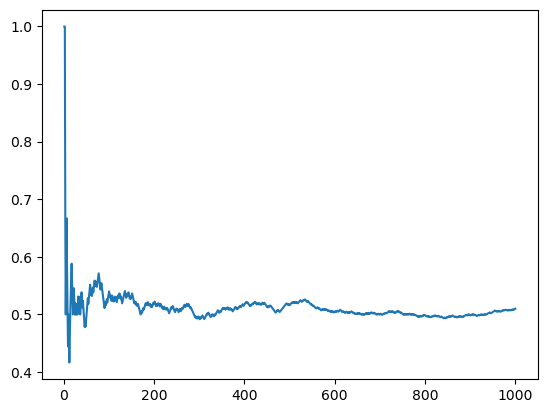

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f84867674f0>

In [17]:
number = 1000
f = zeros(Float64, number)
p = 0.5
k = 0

for i = 1:number
    if p > rand()
        k += 1
    end
    f[i] = k / i
end

plot(1:number, f)

## 中心極限定理

- 2個のサイコロを振ったとき、2個のサイコロの合計が最も高くなるのは7のとき：

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig3-5-1.jpg)

- 一度に振るサイコロを増やしたときにどうなるのか、を考えるのが中心極限定理

### 中心極限定理とは

同一の分布に従う $n$ 個の乱数があったとする。その合計 $x$ の分布はどうなるかを考える。

もとの分布の平均値を $\mu$ 、分散を $\sigma^2$ とすると、もとの分布が何であろうと、 $n$ の値（先の例ではサイコロの数）が大きくなるにつれて、平均が $n\mu$ 、分散が $n\mu^2$ の正規分布に近づく。これを**中心極限定理**と言う。

### 中心極限定理の実験

区間 $[0,1)$ の一様乱数を $n$ 個発生させたとする。一様乱数の平均値 $\mu$、分散 $\sigma^2$ は

$$
    平均値：E(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx = \int_{0}^{1}xdx = \frac{1}{2} \\
    分散：E(x) = \int_{-\infty}^{\infty}(x-E(x))^2 f(x)dx = \int_{0}^{1}\left(n - \frac{1}{2}\right)dx = \frac{1}{12} 
$$

となり、$\mu = 1/2, \sigma = 1/12$ なので、一様乱数 $n$ 個の合計 $x$ の分布は平均値、分散がそれぞれ $n/2, n/12$ の正規分布に近づく。

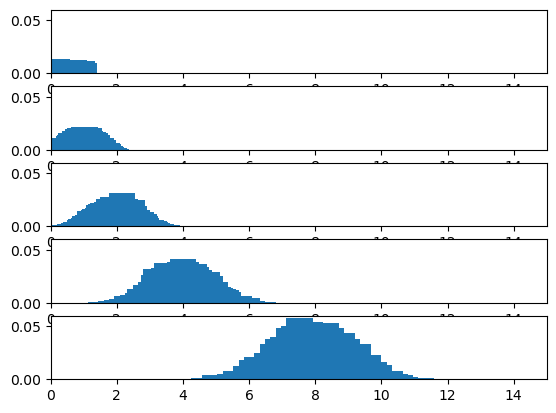

In [5]:
using PyPlot

number = 5000
p = 0.5
size = 100
f = zeros(Int, size)

function central(n::Int)::Float64
    x = 0.0
    for k = 1:n
        x += rand()
    end
    
    return x
end

function experience(n::Int)::Array{Int, 1}
    f = zeros(Int, size)
    for j = 1:number
        x = central(n)
        u = Int(ceil(x * size / n))
        f[u] += 1
    end
    
    return f
end

fig = PyPlot.figure()

n = 1
for i = 1:5
    f = zeros(Int, size)
    for j = 1:number
        u = Int(ceil(central(n) * size / n))
        f[u] += 1
    end
    ax = fig.add_subplot(5, 1, i)
    x = range(0.0, step=(1.0/size*n), length=size)
    ax.bar(x, f / number)
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 0.06)
    
    n *= 2
end

## 演習問題

1. 指数分布のプログラムにおいて、指数分布の理論値を用いて、 `f[u] / j` の項を、 $\chi^2$ 検定せよ。
2. ベルヌーイ試行を連続して行ったとき、 $k$ 回失敗が続いて、 $(k+1)$ 回目にはじめて成功したする。その時の $k$ の分布 $g(k)$ は $p\cdot q^k$ となり、これを**幾何分布**と呼ぶ。乱数発生により、多数回のベルヌーイ試行の実験を行い、最初に成功する試行回数 $k$ の分布を求め $g(k)$ と比較せよ。

### 演習 1. 回答

In [200]:
using Printf

"""
指数分布の理論値の計算
"""
function exponential(lambda::Float64, tau::Float64)::Float64
    return (lambda * exp(-lambda*tau))
end

# ポアソン到着の実験
t_end = 1000            # シミュレーション終了時刻
t_disp = 20.0           # シミュレーション表示時刻
tau_max = 10            # τ の最大値
f = zeros(Int, tau_max) # 実験の値
lambda = 1.0            # λ の値
dt = 0.01               # 微小時間
t0 = 0.0                # 一つ前の事象が発生した時刻
t = 0.0                 # 現在時刻
tau = 0.0               # 事象発生の間隔 τ
j = 0                   # 事象発生の回数

# メインの処理
while t <= t_end
    if (lambda * dt > rand())
        tau = t - t0
        u = Int(floor(tau))
        if (u <= tau_max) 
            f[u+1] += 1
        end
        t0 = t
        j += 1
    end    
    global t += dt
end

# χ^2 検定
@printf "%2s %10s %10s\n" "i" "f[i]" "f0[i]"
xs = 0.0            # カイ二乗の値
for i = 1:tau_max
    f0 = exponential(lambda, i - 1 + 0.5) * lambda * t_end
    @printf "%2s %10f %10f\n" i f[i] f0
    diff = f[i] - f0
    xs = xs + diff^2 / f0
end

@printf "xs = %10f" xs

 i       f[i]      f0[i]
 1 691.000000 606.530660
 2 248.000000 223.130160
 3  78.000000  82.084999
 4  24.000000  30.197383
 5  17.000000  11.108997
 6   1.000000   4.086771
 7   0.000000   1.503439
 8   0.000000   0.553084
 9   1.000000   0.203468
10   0.000000   0.074852
xs =  26.715905

### 演習2 回答

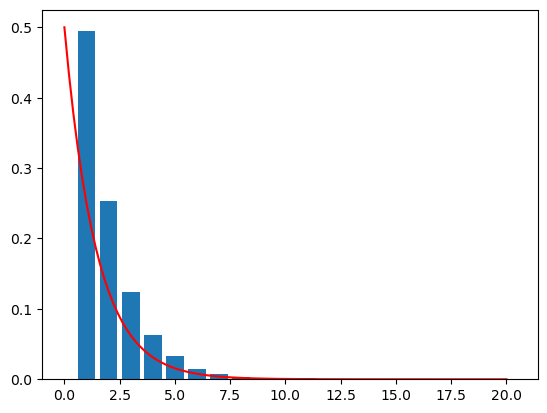

 k       f[k]      g0[k]
 1   0.495257   0.500000
 2   0.253280   0.250000
 3   0.124117   0.125000
 4   0.063370   0.062500
 5   0.032896   0.031250
 6   0.014329   0.015625
 7   0.008073   0.007812
 8   0.003229   0.003906
 9   0.002220   0.001953
10   0.000807   0.000977
11   0.001211   0.000488
12   0.000404   0.000244
13   0.000404   0.000122
14   0.000000   0.000061
15   0.000404   0.000031
16   0.000000   0.000015
17   0.000000   0.000008
18   0.000000   0.000004
19   0.000000   0.000002
20   0.000000   0.000001


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f84892e31f0>

In [229]:
using Printf

number = 10000
p = 0.5
n = 0                    # 成功の回数の合計
f = zeros(Int, number)   # 度数

"""
ベルヌーイ試行の実行
発生させた乱数が確率 p より小さかったら（=失敗）、失敗が続いた回数を1つ増やす。
発生させた乱数が確率 p より大きかったら（=成功）、度数を1つ増やす。
"""
k = 0             # 失敗が続いた回数
for i = 1:number
    if p < rand()
        k += 1
    else
        n += 1
        f[k+1] += 1
        k = 0
    end
end

@printf "%2s %10s %10s\n" "k" "f[k]" "g0[k]"
for k = 1:20
    g0 = p * (1-p)^(k-1)
    @printf "%2s %10f %10f\n" k f[k]/n g0
end

# シミュレーション結果のヒストグラムのプロット
x1 = 1:20
f1 = f[1:20]
bar(x1, f1/n)

# 理論値のグラフ描画
x2 = range(0, 20, length=100)
plot(x2, p * (1-p).^(x2), color="r")